In [1]:
import numpy as np
from matplotlib import pyplot as plt
import lqfn.numerical.pimc.metropolis as metropolis

In [2]:
N=20
a=0.5
eps=1.4
N_cor=20
N_cf=1000
E_0 = 0.5
E_1 = 1.5
N_copies =10

In [3]:
def S(j,x): # harm. osc. S
    jp = (j+1)%N # next site
    jm = (j-1)%N # previous site
    return a*x[j]**2/2 + x[j]*(x[j]-x[jp]-x[jm])/a

In [4]:
def compute_G(x,n):
    g = 0
    for j in range(0,N):        
        g = g + x[j]*x[(j+n)%N]
    return g/N

In [5]:
avg, std = metropolis.compute_path_integral_average(compute_G, S, N, N_cf, N_cor, eps)

In [6]:
def delta_E(avg):
    delta_E = np.zeros(N-1)
    for n in range (0,N-1):
        delta_E[n] = np.log(np.abs(avg[n]/avg[n+1]))
    return delta_E

def error_delta_E(avg, std):
    error_delta_E = np.zeros(N-1)
    for n in range (0,N-1):
        error_delta_E[n] = np.sqrt(((std[n] / avg[n])**2 + 
                                   (std[n+1] / avg[n+1])**2)) #propagation of error
    return error_delta_E

In [7]:
avg_bootstrap = np.zeros((N_copies,N))
for i in range (N_copies):
    avg_bootstrap[i] = metropolis.compute_path_integral_average_bootstrap(compute_G, S, N, N_cf, N_cor, eps)[0]

In [8]:
def compute_delta_E_bootstrap(avg_bootstrap):
    delta_E_bootstrap = np.zeros((N_copies,N-1))
    for i in range (N_copies):
        delta_E_bootstrap[i] = delta_E(avg_bootstrap[i])
    avg = delta_E_bootstrap.mean(axis=0)
    std = delta_E_bootstrap.std(axis=0) 
    return avg, std

In [9]:
average_delta_E_with_bootstrap, std_delta_E_with_boostrap = compute_delta_E_bootstrap(avg_bootstrap)

In [10]:
t = np.arange(N-1) * a
E_exact = np.ones(N-1) * (a*(E_1-E_0))

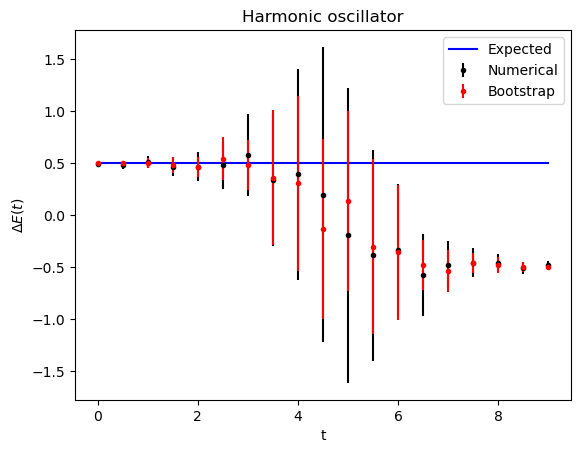

In [11]:
plt.plot(t, E_exact ,'b',label='Expected')
#plt.scatter(t, delta_E(avg), color='black', label='Numerical', s=1)
#plt.scatter(t, average_delta_E_with_bootstrap, color= 'red', label = 'bootstrap', s=1)
plt.errorbar(t, delta_E(avg), yerr=error_delta_E(avg, std), fmt='.', color='black', label='Numerical')
plt.errorbar(t, average_delta_E_with_bootstrap, yerr=std_delta_E_with_boostrap,color='red' ,label='Bootstrap',fmt='.')
plt.legend(loc='upper right')
plt.title('Harmonic oscillator')
plt.xlabel('t')
plt.ylabel(r'$\Delta E(t)$')
plt.show()